# ML HW7
### 資科工碩 0756166 楊牧樺

Please execute step by step.

## Part 1 - Different ways to do dimension reductions

## 0. Preparation

### 0.1 Import librarys

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 0.2 Read data

In [2]:
mnist_x = np.genfromtxt('mnist_X.csv', delimiter=',')
mnist_y = np.genfromtxt('mnist_label.csv', delimiter=',')

## 1. PCA

<font color="#006666">Goal:</font><br />
We want to find an orthogonal projection W in which the data x after projection z =Wx will have maximum variance, i.e.minimum mean square error (MSE)  

<font color="#006666">Step:</font><br />
1. Zero mean -Input data subtract the mean for each value of each variable.
2. Compute covariance matrix of input.
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components.
4. Ordering eigenvectors by their eigenvalues in descending order, allow us to find the principal components in order of significance. We choose to keep only p eigenvectors to be feature vector.
5. Recast the data along the principal components axes, using the sorted eigen vector.

<font color="#006666">Reference:</font><br />
*  https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71 
* https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2
* https://blog.csdn.net/zhili8866/article/details/52947303?fbclid=IwAR1Y6wO4bcCngxHI4xbh7r5lwUUzsodjnPuFc4LzW2l2F_m7eHgsf6TNifw  
* http://arbu00.blogspot.com/2017/02/6-principal-component-analysispca.html  
* https://www.cnblogs.com/jclian91/p/8024101.html

In [3]:
def visualize(x, y, title):
    plt.figure()
    #plt.scatter(x[:,0], x[:,1],c=y,alpha=1,s=20)
    for l in np.unique(y):
        plt.scatter(x[y==l,0], x[y==l,1], s=20, label=str(int(l)))
    plt.legend()
    plt.title(title)    
    plt.show()

In [4]:
def zeroMean(x):        
    meanVal = np.mean(x,axis=0)
    newData = (x-meanVal)
    return newData 

In [38]:
def PCA(x, no_dims=2):
    x = zeroMean(x)
    sigma = np.cov(x, rowvar=0) #convariance matrix
    eigen_values, eigen_vectors = np.linalg.eig(sigma)
    index = np.argsort(eigen_values)[::-1][:no_dims] # Sort eigen value in descending order(largest to smallest)
    w = eigen_vectors[:,index] 
    result = np.dot(x, w) # transformed data
    
    return(result)
    
        

/home/muhua/miniconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


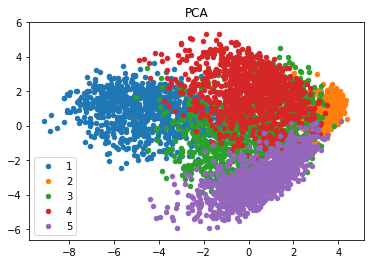

In [40]:
result = PCA(mnist_x)
visualize(result, mnist_y, 'PCA')

<font color="#006666">Observe:</font><br />  
The result of PCA is not good. Since the data points of different labels stick together, they do not show good partitioning. The reason is because PCA aims to find orthogonal items with the largest projection data variance, regardless of the label of the data points. Therefore, this method can make the data sparse, but data of different labels may not be  saparated.

## 2. LDA

The general LDA approach is very similar to PCA, , but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA). LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.

<font color="#006666">Step:</font><br />
1. Computing the within-class scatter matrix and between-class scatter matrix.
2. Compute eigen values and eigen vectors of the matrix $S_{w}^{-1}S_{b}$ ($S_{w}$ may be not invertable, we can use pseudo-inverse.)
3. Ordering eigenvectors by their eigenvalues in descending order, the eigen vector with largest eigen value is the most important. We choose to keep only p eigenvectors to be feature vector.
4. Transforming the samples onto the new subspace.

<font color="#006666">Reference:</font><br />
* https://sebastianraschka.com/Articles/2014_python_lda.html

In [41]:
def LDA(x, y, no_dims=2):
    
    labels = np.unique(y)
    mean_vectors = []
    s_w = np.zeros((x.shape[1], x.shape[1])) # Within-class scatter matrix
    s_b = np.zeros((x.shape[1], x.shape[1])) # Between-class scatter matrix
    overall_mean = np.mean(x, axis=0)
    
    for l in labels:
        mean_vectors.append( np.mean(x[y==l], axis=0))
        s_w += np.cov(x[y==l], rowvar=False)
    for i,mean_vec in enumerate(mean_vectors):
        n = x[y == i+1,:].shape[0]
        mean_vec = mean_vec.reshape(x.shape[1],1)
        overall_mean = overall_mean.reshape(x.shape[1],1)
        s_b += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.pinv(s_w).dot(s_b))
    
    index = np.argsort(eigen_values)[::-1][:no_dims] 
    w = eigen_vectors[:,index] 
    result = np.dot(x, w)
    return result    


/home/muhua/miniconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


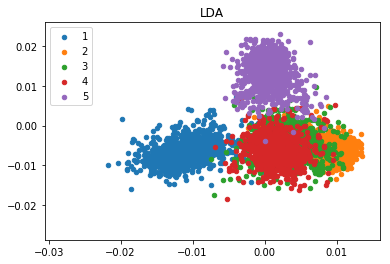

In [42]:
result = LDA(mnist_x, mnist_y)
visualize(result, mnist_y, 'LDA')

<font color="#006666">Observe and Compare:</font><br /> 
PCA finds the axes with maximum variance for the whole data set where LDA tries to find the axes for best class seperability. In theory, the effect of LDA should be better. However, there is not much better, LDA does not completely separate the data by labels.

## 3. T-SNE

The T-SNE code is provided by TA.

<font color="#006666">Reference:</font><br />
* http://www.datakit.cn/blog/2017/02/05/t_sne_full.html

In [11]:
def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P

In [12]:
def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


In [54]:
def tsne(x, label, no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """
    
    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = PCA(x, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)
    P_fi = P
    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)
        
        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            
            P = P / 4.

    
    # Return solution
    return Y, P_fi, Q

In [55]:
Y, P, Q = tsne(mnist_x,mnist_y, 2, 50, 30.0)

Computing pairwise distances...
Computing P-values for point 0 of 5000...
Computing P-values for point 500 of 5000...
Computing P-values for point 1000 of 5000...
Computing P-values for point 1500 of 5000...
Computing P-values for point 2000 of 5000...
Computing P-values for point 2500 of 5000...
Computing P-values for point 3000 of 5000...
Computing P-values for point 3500 of 5000...
Computing P-values for point 4000 of 5000...
Computing P-values for point 4500 of 5000...
Mean value of sigma: 1.931174
Iteration 10: error is 25.078350
Iteration 20: error is 23.880562
Iteration 30: error is 20.477785
Iteration 40: error is 18.718737
Iteration 50: error is 18.026770
Iteration 60: error is 17.617694
Iteration 70: error is 17.445965
Iteration 80: error is 17.317935
Iteration 90: error is 17.221595
Iteration 100: error is 17.147050
Iteration 110: error is 2.559478
Iteration 120: error is 2.366937
Iteration 130: error is 2.235349
Iteration 140: error is 2.131202
Iteration 150: error is 2.043

In [35]:
def visualize_similarities(P, Q):
    plt.figure()
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    plt.subplot(1,2,1)
    plt.imshow(P)
    plt.title("Similarities in high-dimensional space")
    plt.subplot(1,2,2)
    plt.imshow(Q)
    plt.title("Similarities in low-dimensional space")
    plt.show()

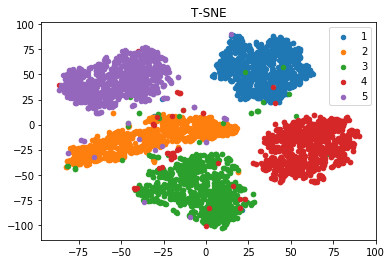

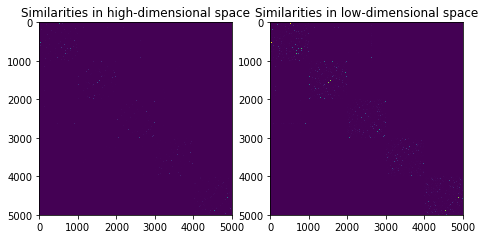

In [64]:
visualize(Y, mnist_y, 'T-SNE')
visualize_similarities(P, Q)

<font color="#006666">Observe and Compare:</font><br /> 
Obviously, result of t-SNE is much better than PCA and LDA. We can clearly observe that the data points are separated by labels.  
If we increase the perplexity, If we increase the perplexity, we will observe that t-SNE has a tendency to regress and cause crowding problem.

## 4. Symmetric SNE

We use the t-SNE code provided by TA to do Symmetric SNE. The difference between Symmetric SNE and t-SNE is the calculation of pairwise similarities in low-dimensional space, which leads to differences in objective function and gradient.

In [56]:
def symmetric_sne(x, label, no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """
    
    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = PCA(x, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    '''
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))
    '''
    Y_SNE = np.random.randn(n, no_dims)
    dY_SNE = np.zeros((n, no_dims))
    iY_SNE = np.zeros((n, no_dims))
    gains_SNE = np.ones((n, no_dims))
    C_SNE = []
    Q_SNE = np.zeros((n, n))
    
    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)
    P_fi = P
    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        '''
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)
        '''
        sum_Y_SNE = np.sum(np.square(Y_SNE), 1)
        num_SNE = -2. * np.dot(Y_SNE, Y_SNE.T)
        num_SNE = np.add(np.add(num_SNE, sum_Y_SNE).T, sum_Y_SNE)
        num_SNE = np.exp(-1*num_SNE)
        num_SNE[range(n), range(n)] = 0.
        Q_SNE = num_SNE / np.sum(num_SNE)
        Q_SNE = np.maximum(Q_SNE, 1e-12)
        
        # Compute gradient
        #PQ = P - Q
        PQ_SNE = P - Q_SNE
        
        for i in range(n):
            #dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)
            dY_SNE[i, :] = np.sum(np.tile(PQ_SNE[:,i], (no_dims, 1)).T * (Y_SNE[i, :] - Y_SNE), 0)
        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        '''
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))
        '''
        
        gains_SNE = (gains_SNE + 0.2) * ((dY_SNE > 0.) != (iY_SNE > 0.)) + \
            (gains_SNE * 0.8) * ((dY_SNE > 0.) == (iY_SNE > 0.))
        gains_SNE[gains_SNE < min_gain] = min_gain
        iY_SNE = momentum * iY_SNE - eta * (gains_SNE * dY_SNE)
        Y_SNE = Y_SNE + iY_SNE
        Y_SNE = Y_SNE - np.tile(np.mean(Y_SNE, 0), (Y_SNE.shape[0], 1))
        
        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            '''
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))
            '''
            C_SNE = np.sum(P * np.log(P / Q_SNE))
            print("Iteration %d: error is %f" % (iter + 1, C_SNE))
        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution    
    return Y_SNE, P_fi, Q_SNE

In [57]:
Y_SNE, P_SNE, Q_SNE = symmetric_sne(mnist_x,mnist_y, 2, 50, 32.0)

Computing pairwise distances...
Computing P-values for point 0 of 5000...
Computing P-values for point 500 of 5000...
Computing P-values for point 1000 of 5000...
Computing P-values for point 1500 of 5000...
Computing P-values for point 2000 of 5000...
Computing P-values for point 2500 of 5000...
Computing P-values for point 3000 of 5000...
Computing P-values for point 3500 of 5000...
Computing P-values for point 4000 of 5000...
Computing P-values for point 4500 of 5000...
Mean value of sigma: 1.952543
Iteration 10: error is 24.984155
Iteration 20: error is 22.314794
Iteration 30: error is 16.804676
Iteration 40: error is 16.897323
Iteration 50: error is 17.396021
Iteration 60: error is 17.450606
Iteration 70: error is 17.280749
Iteration 80: error is 17.158625
Iteration 90: error is 17.171243
Iteration 100: error is 17.170112
Iteration 110: error is 2.369782
Iteration 120: error is 2.174848
Iteration 130: error is 2.147146
Iteration 140: error is 2.148798
Iteration 150: error is 2.153

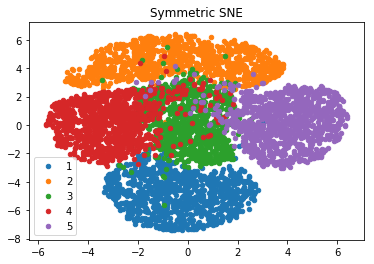

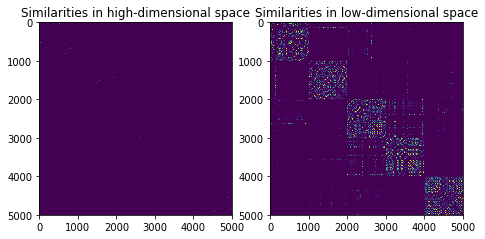

In [63]:
visualize(Y_SNE, mnist_y, 'Symmetric SNE')
visualize_similarities(P_SNE, Q_SNE)

<font color="#006666">Observe and Compare:</font><br /> 
Compared with t-SNE, the gap between each group is smaller so it`s less easy to identify.  
In pairwise similarities in low-dimensional space, we can see approximately 5 squares in the graph, representing 5 groups of data.

## Part 2 - Eigenface

<font color="#006666">Reference:</font><br /> 
* https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184    

## 0. Preparation

### 0.1 Import librarys

In [43]:
import os, random
import numpy as np
import matplotlib.pyplot as plt

### 0.2 Read data

In [44]:
dir='att_faces'
celebrity_images = []
for i in range(40):
    target_dir = dir+'/s'+str(i+1)
    celebrity_photos=os.listdir(target_dir)[0:11]
    celebrity_photos.sort(key =str.lower)
    celebrity_photos.sort(key =len)
    celebrity_images+=[target_dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
n_samples, h, w =images.shape

In [74]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

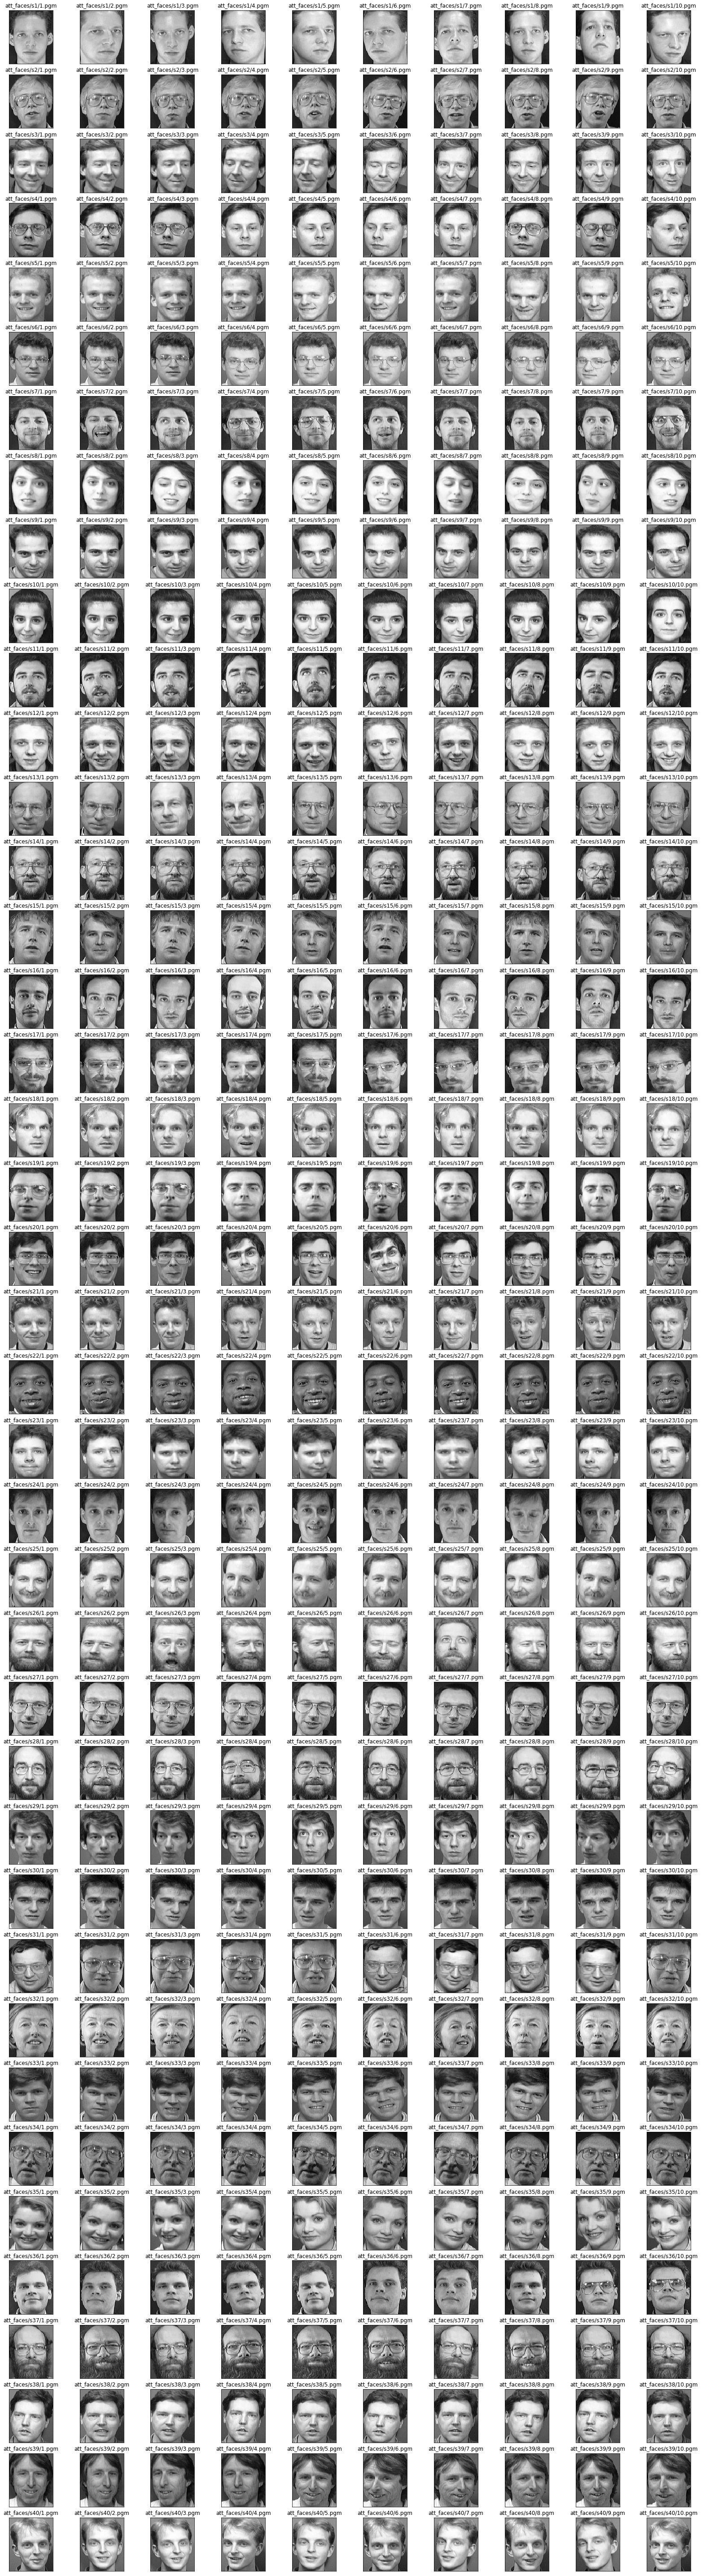

In [75]:
plot_portraits(images, celebrity_images, h, w, n_row=40, n_col=10)

## 1. Use PCA to show the first 25 eigenfaces

We reduce data from 10340 dimensions to only 50 dimensions. This, we show first 25 eigenfaces.

In [47]:
def pca(x, no_dims=50):
    meanVal = np.mean(x,axis=0)
    x = x - meanVal
    sigma = np.cov(x, rowvar=0) #convariance matrix
    eigen_values, eigen_vectors = np.linalg.eig(sigma)
    index = np.argsort(eigen_values)[::-1][:no_dims] # Sort eigen value in descending order(largest to smallest)
    w = eigen_vectors[:,index] 
    result = np.dot(x, w)
    
    return result, w, meanVal

In [48]:
x = images.reshape(n_samples, h*w)
reduced_x, components, mean_x = pca(x)

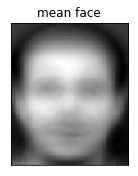

In [49]:
mean_face = mean_x.reshape((1,h,w))
plot_portraits(mean_face, ['mean face'], h, w, 1, 1)

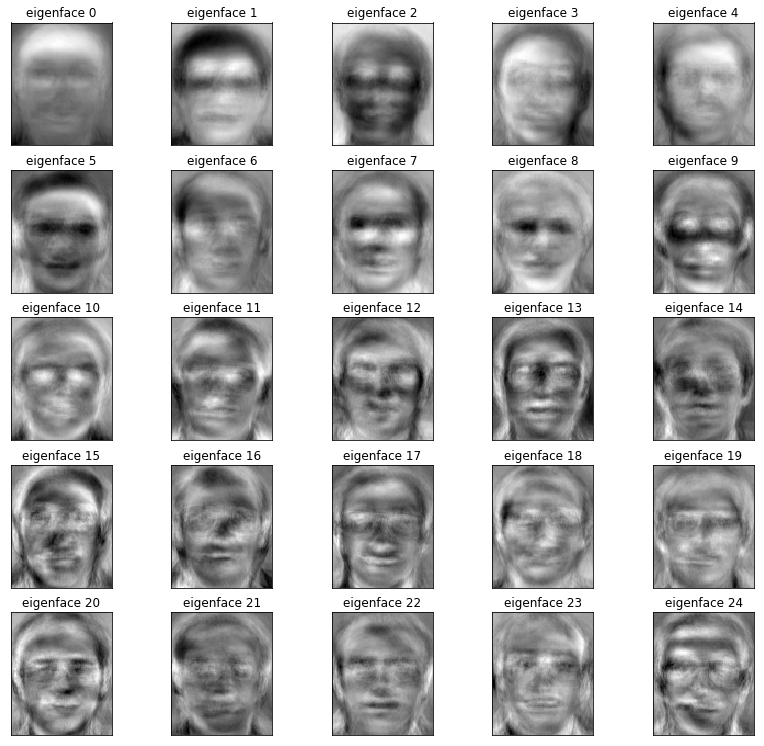

In [50]:
eigenfaces = (components.real.T[:25,:]).reshape((25, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 5, 5) 

## 2. Randomly pick 10 images to show their reconstruction

<font color="#006666">Observe:</font><br /> 
Observing the reconstructed face, you can find that the reconstructed face on the right side can still distinguish different people, but the clear facial features are blurred. Of course, if we take more feature faces, the reconstructed face will be similar to the original face.

In [51]:
def reconstruction(x, components, mean):
    result = np.dot(x,components.T)+mean
    return result.real

In [52]:
reconstruct_idx = np.random.randint(0, n_samples, 10)
recovered_images = []
original_images = []
for i in range(10):
    index = reconstruct_idx[i]
    recovered_images.append(reconstruction(reduced_x[i], components, mean_x))
    original_images.append(images[i])
recovered_images = np.array(recovered_images)
original_images = np.array(original_images)
recovered_images = recovered_images.reshape((10,h,w))

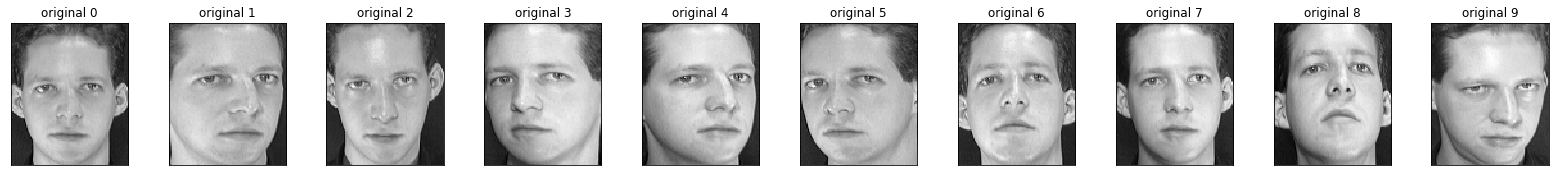

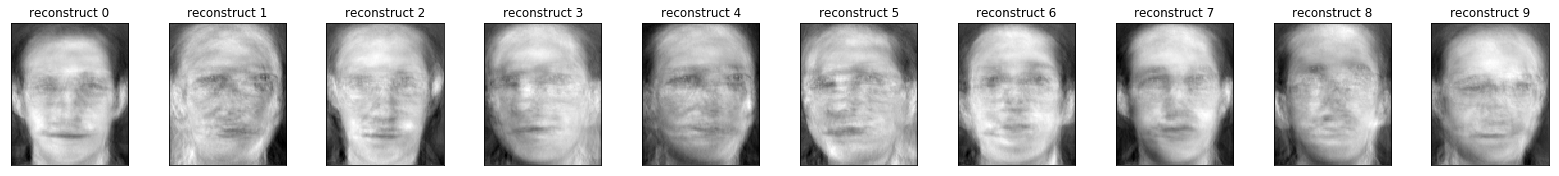

In [53]:
recovered_titles = ["reconstruct %d" % i for i in range(recovered_images.shape[0])]
original_titles = ["original %d" % i for i in range(recovered_images.shape[0])]
plot_portraits(original_images, original_titles, h, w, 1, 10) 
plot_portraits(recovered_images, recovered_titles, h, w, 1, 10) 